INTRODUCTION:

olympicsdata gives us an brief introduction about the olympics which had been took place at a certain period of time.various countries had participated in these olympics.The main aim of this dataset is to know how many medals that a particular country has been bagged and also to know the count of gold_medal,silver_medal,brone_medal and total_medal that a person has been awarded with.

DATASET EXPLANATION:

The Features includes name,age of a participant who had been participated in olympics.While it also consists of country to which the participant belongs to.It also includes year,date,Sports and also the information how many gold_medals,silver_medals,brone_medals,total_medal which the participant had been bagged in the olympics.

In [38]:
pip install pyspark #Installing Pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


Write PySpark code to read the olympix_data.csv file

In [3]:
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1) (1).csv") 
df.show() 
#Reading the data set of a csv file in the form of records

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

Write PySpark code to print the Olympic Sports/games in the dataset.

In [ ]:
df.select("sports").show()  #the select()function allows us to select single or multiple columns in different formats
                            #show() is used to display the contents of the dataframe in a table

+--------------------+
|              sports|
+--------------------+
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|          Gymnastics|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|       Speed Skating|
|          Gymnastics|
|Cross Country Skiing|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
|            Swimming|
+--------------------+
only showing top 20 rows



From the above ,it is to be noted that the swimming is the most frequent sport in the olympics.

Write PySpark code to plot the total number of medals in each Olympic Sport/game

In [4]:
new_df = df.agg({"total_medal":"count"}).show() ##count()in pyspark is used to return the number of rows from particular coulmn in a dataframe.

+------------------+
|count(total_medal)|
+------------------+
|              8618|
+------------------+



The count of total_medal were 8618 for olympics.

In [5]:
res = df.groupBy("sports").sum("total_medal").show()  
 ##sum() in PySpark returns the total (sum) value from a particular column in the DataFrame
 ##groupBy() is used to collect the identical data into groups on the PySpark DataFrame and perform aggregate functions on the grouped data

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
+--------------------+----------------+
only showing top 20 rows



The highest sum(total_medal) was for Swimming as well as for Athletics.

In [ ]:
new_df = df.toPandas()                         #.topandas()is used to convert the pyspark dataframe to pandas dataframe
print(new_df)

                      name   age        country  year  Date_Given      sports  \
0           Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1           Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2           Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3         Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4            Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   
...                    ...   ...            ...   ...         ...         ...   
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000     Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000     Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000     Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000     Archery   
8617             Rod White  23.0  United States  2000  10-01-2000     Archery   

      gold_medal  silver_me

From the above it is to be noted that the dataframe has been changed from pyspark to pandas dataframe .

In [28]:
# the filereading
import numpy as np                                
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

new_df = pd.read_csv("olympix_data_organized_with_header (1) (1) (1).csv")
print(new_df)

                      name   age        country  year  Date_Given      sports  \
0           Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1           Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2           Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3         Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4            Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   
...                    ...   ...            ...   ...         ...         ...   
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000     Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000     Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000     Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000     Archery   
8617             Rod White  23.0  United States  2000  10-01-2000     Archery   

      gold_medal  silver_me

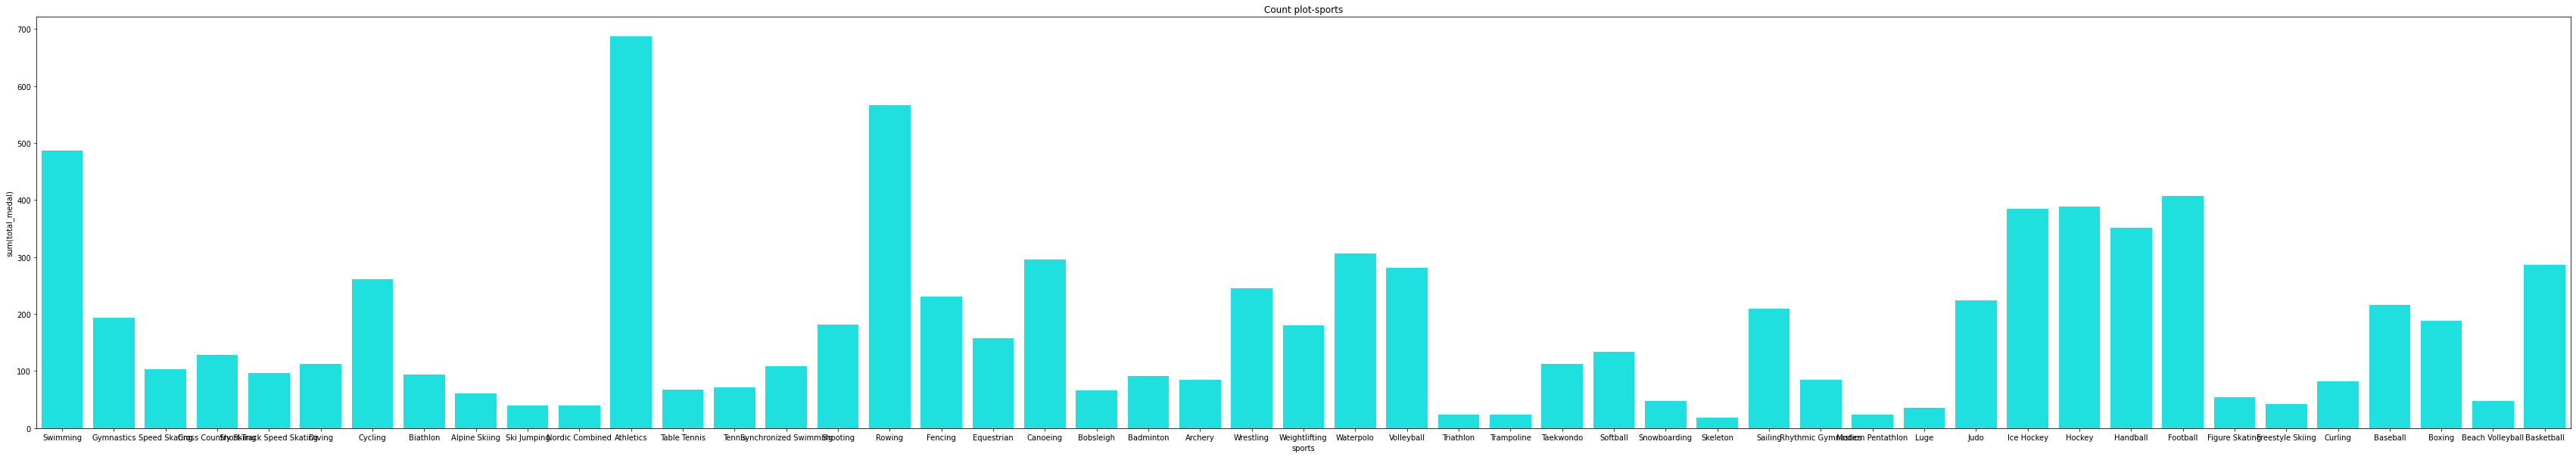

In [34]:
plt.figure(figsize=(60,10))
sns.countplot(x='sports',data=df,color='cyan') #countplot is applicable only for categorical data to count observations in each category.
plt.title('Count plot-sports')                            #x-axis shows about the sports
plt.xlabel('sports')                           #y-axis shows about the sum(total_medal)
plt.ylabel('sum(total_medal)')                           
plt.show()

From the above graph it is to be noted that the sum(total_medal) maximum is for Athletics and swimming.

sort the result based on the total no.of medals.

In [14]:
import pyspark.sql.functions as f
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1) (1).csv")  
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [16]:
new_df=df.orderBy(f.desc("total_medal")) ##PySpark orderby is a spark sorting function used to sort the data frame / RDD in a PySpark Framework. It is used to sort one more column in a PySpark Data Frame. The Desc method is used to order the elements in descending order.
new_df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

Find the total no.of medals won by each country in swimming.

In [17]:
df.filter(df.sports=="Swimming").groupBy("country").sum("total_medal").show() 
#PySpark filter() function is used to filter the rows from RDD/DataFrame based on the given condition 
##sum() in PySpark returns the total (sum) value from a particular column in the DataFrame
 ##groupBy() is used to collect the identical data into groups on the PySpark DataFrame and perform aggregate functions on the grouped data

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|              20|
|       Sweden|               9|
|      Germany|              32|
|       France|              39|
|     Slovakia|               2|
|    Argentina|               1|
|Great Britain|              11|
|United States|             267|
|        China|              35|
|      Belarus|               2|
|      Croatia|               1|
|        Italy|              16|
|    Lithuania|               1|
|       Norway|               2|
|        Spain|               3|
|      Denmark|               1|
|      Ukraine|               7|
|  South Korea|               4|
|     Zimbabwe|               7|
|      Tunisia|               3|
+-------------+----------------+
only showing top 20 rows



The highest sum(total_medal)is for the country United States in the category of swimming.

Find the total number of medals won by each country in skeleton

In [18]:
df.filter(df.sports=="Skeleton").groupBy("country").sum("total_medal").show()
##PySpark filter() function is used to filter the rows from RDD/DataFrame based on the given condition 
##sum() in PySpark returns the total (sum) value from a particular column in the DataFrame
 ##groupBy() is used to collect the identical data into groups on the PySpark DataFrame and perform aggregate functions on the grouped data

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



In the category of sports ,in the skeleton the highest no.of sum(total_medal) is for canada.

Find the no.of medals that the U.S.won yearly

In [19]:
df.filter(df.country=="United States").groupBy("year").sum("total_medal").show()
##sum() in PySpark returns the total (sum) value from a particular column in the DataFrame
 ##groupBy() is used to collect the identical data into groups on the PySpark DataFrame and perform aggregate functions on the grouped data

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



In the year 2008 the United States had bagged maximum of medals.

Find the total number of medals won by each country

In [20]:
df.groupBy("country").sum("total_medal").show() ##sum() in PySpark returns the total (sum) value from a particular column in the DataFrame
 ##groupBy() is used to collect the identical data into groups on the PySpark DataFrame and perform aggregate functions on the grouped data

+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|     Singapore|               7|
|      Malaysia|               3|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|       Algeria|               8|
|          Togo|               1|
|      Slovakia|              35|
|     Argentina|             141|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



who was the oldest athelete in the olympics

In [21]:
import pyspark.sql.functions as f
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1) (1).csv")  
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [22]:
new_df=df.orderBy(f.desc("age")).select("name","age")  ##PySpark orderby is a spark sorting function used to sort the data frame / RDD in a PySpark Framework. It is used to sort one more column in a PySpark Data Frame. The Desc method is used to order the elements in descending order.
new_df.show()

+--------------------+---+
|                name|age|
+--------------------+---+
|          Ian Millar| 61|
|           Mark Todd| 56|
|            Mac Cone| 55|
|        Nick Skelton| 54|
|       Peter Charles| 52|
|Lesley Thompson-W...| 52|
|   Mary Thomson-King| 51|
|       Ilario Di Buò| 51|
|       Peter Thomsen| 51|
|    Andrew Nicholson| 50|
|        Jean Teulère| 50|
|     Rajmond Debevec| 49|
|        Will Simpson| 49|
|         Russ Howard| 49|
|     Debbie McDonald| 49|
|        Robert Dover| 48|
|       Kevin Burnham| 47|
|     Harald Stenvaag| 47|
|       Peter Thomsen| 47|
|   Mary Thomson-King| 47|
+--------------------+---+
only showing top 20 rows



The oldest athelete is Ian Millar 

which country was he/she from

In [23]:
new_df=df.orderBy(f.desc("age")).select("name","age","country")  ##PySpark orderby is a spark sorting function used to sort the data frame / RDD in a PySpark Framework. It is used to sort one more column in a PySpark Data Frame. The Desc method is used to order the elements in descending order.
new_df.show()

+--------------------+---+-------------+
|                name|age|      country|
+--------------------+---+-------------+
|          Ian Millar| 61|       Canada|
|           Mark Todd| 56|  New Zealand|
|            Mac Cone| 55|       Canada|
|        Nick Skelton| 54|Great Britain|
|       Peter Charles| 52|Great Britain|
|Lesley Thompson-W...| 52|       Canada|
|   Mary Thomson-King| 51|Great Britain|
|       Ilario Di Buò| 51|        Italy|
|       Peter Thomsen| 51|      Germany|
|    Andrew Nicholson| 50|  New Zealand|
|        Jean Teulère| 50|       France|
|     Rajmond Debevec| 49|     Slovenia|
|        Will Simpson| 49|United States|
|         Russ Howard| 49|       Canada|
|     Debbie McDonald| 49|United States|
|        Robert Dover| 48|United States|
|       Kevin Burnham| 47|United States|
|     Harald Stenvaag| 47|       Norway|
|       Peter Thomsen| 47|      Germany|
|   Mary Thomson-King| 47|Great Britain|
+--------------------+---+-------------+
only showing top

The oldest athlete is from Canada.

conclusion:
=>The  maximum sum of total_medal has been bagged from the sport Athletics as well as swimming.

=>The oldest athlete in the olympics is Ian Millar from Canada.


=>The maximum medals bagged by United States was 317 in the year 2008.

=>The count of total_medal were 8618 for olympics.

=>The highest sum(total_medal)is for the country United States in the category of swimming.

=>In the category of sports ,in the skeleton the highest no.of sum(total_medal) is for canada.
